# Styx Quickstart

This notebook demonstrates basic usage of the Styx framework for gradient descent experimentation.

In [1]:
import sys
sys.path.append('../src')

import torch
import torch.nn as nn
from styx.models import MLP
from styx.datasets import get_mnist, get_dataloader
from styx.experiments import Trainer
from styx.visualization import plot_training_history

## Load Dataset

In [2]:
train_dataset, test_dataset = get_mnist(data_dir='../data', download=True)
train_loader = get_dataloader(train_dataset, batch_size=64, shuffle=True)
test_loader = get_dataloader(test_dataset, batch_size=64, shuffle=False)

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")

100%|██████████| 9.91M/9.91M [00:02<00:00, 3.44MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.59MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.35MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.69MB/s]

Training samples: 60000
Test samples: 10000


## Create Model

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

model = MLP(
    input_dim=784,
    hidden_dims=[256, 128],
    output_dim=10,
    dropout=0.2
)

print(model)

Using device: cpu
MLP(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)


## Setup Training

In [4]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Define accuracy metric
def accuracy(output, target):
    pred = output.argmax(dim=1)
    return (pred == target).float().mean().item()

trainer = Trainer(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    metrics={'accuracy': accuracy}
)

## Train Model

In [5]:
history = trainer.fit(
    train_loader=train_loader,
    val_loader=test_loader,
    epochs=5,
    verbose=True
)


Epoch 1/5


Training: 100%|██████████| 938/938 [00:02<00:00, 333.80it/s]


train_loss: 0.3960 - train_accuracy: 0.8770


Validation: 100%|██████████| 157/157 [00:00<00:00, 527.06it/s]


val_loss: 0.2078 - val_accuracy: 0.9361

Epoch 2/5


Training: 100%|██████████| 938/938 [00:02<00:00, 352.25it/s]


train_loss: 0.2032 - train_accuracy: 0.9377


Validation: 100%|██████████| 157/157 [00:00<00:00, 522.26it/s]


val_loss: 0.1377 - val_accuracy: 0.9569

Epoch 3/5


Training: 100%|██████████| 938/938 [00:02<00:00, 325.83it/s]


train_loss: 0.1596 - train_accuracy: 0.9512


Validation: 100%|██████████| 157/157 [00:00<00:00, 528.49it/s]


val_loss: 0.1194 - val_accuracy: 0.9636

Epoch 4/5


Training: 100%|██████████| 938/938 [00:02<00:00, 339.81it/s]


train_loss: 0.1390 - train_accuracy: 0.9567


Validation: 100%|██████████| 157/157 [00:00<00:00, 535.71it/s]


val_loss: 0.1013 - val_accuracy: 0.9699

Epoch 5/5


Training: 100%|██████████| 938/938 [00:02<00:00, 334.12it/s]


train_loss: 0.1241 - train_accuracy: 0.9620


Validation: 100%|██████████| 157/157 [00:00<00:00, 529.23it/s]

val_loss: 0.0965 - val_accuracy: 0.9704


## Visualize Results

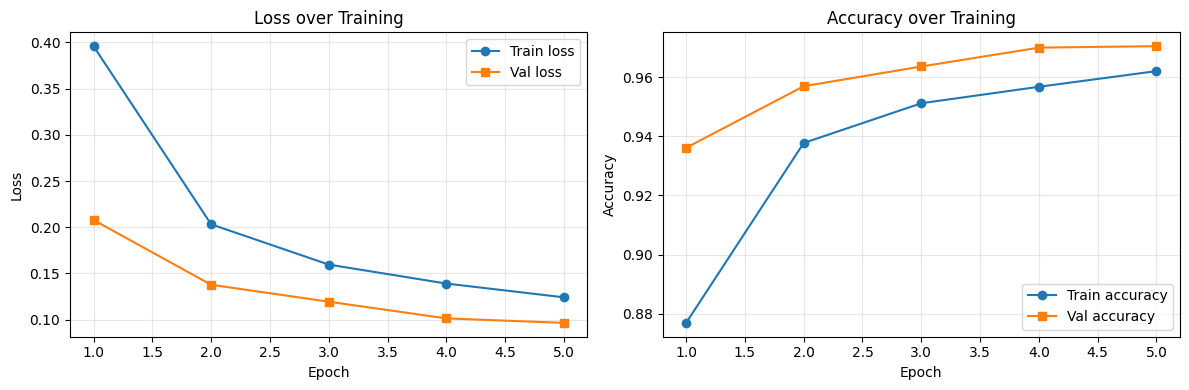

In [6]:
plot_training_history(history)